<a href="https://colab.research.google.com/github/Mariam-Dahy/Data_Mining/blob/main/Classification_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Mariam Dahy

ID: 55-4554

Tutorial: 4

---

Name: Malak Swar

ID: 55-0445

Tutorial: 4

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_text
from sklearn.linear_model import LogisticRegression


%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes


## Data Inspection

In [ ]:
df.info()

for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Cleaning

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan).replace('[\$,]', '', regex=True).astype(float)
df.rename(columns={'TotalCharges': 'TotalCharges($)'}, inplace=True)

def replace_missing(row):
    if pd.isnull(row['TotalCharges($)']):
        return row['MonthlyCharges'] * row['tenure']
    return row['TotalCharges($)']

df['TotalCharges($)'] = df.apply(replace_missing, axis =1)
df['TotalCharges($)'] = df['TotalCharges($)'].round(2)

df['MonthlyCharges'] = df['MonthlyCharges'].replace('', np.nan).replace('[\$/m]', '', regex=True).astype(float)
df.rename(columns={'MonthlyCharges': 'MonthlyCharges($/Month)'}, inplace=True)

df['customerID'] = df['customerID'].fillna('Unknown')


label_encoding = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in label_encoding:
    df[column] = df[column].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0).astype(int)

one_hot_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'StreamingMovies', 'StreamingTV', 'DeviceProtection', 'TechSupport',
                  'PaymentMethod']

contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract'] = df['Contract'].map(contract_mapping)

one_hot_encoded = pd.get_dummies(df[one_hot_columns], prefix=one_hot_columns)
one_hot_encoded = one_hot_encoded.astype(int)
df= pd.concat([df,one_hot_encoded], axis=1)

df

# Dollar signs in the attribute TotalCharges($) are removed.
# The attribute is renamed to be TotalCharges($), this makes it easier to display and the datatype can be changed to float.
# Null values in the attribute TotalCharges($) are replaced by the calculation of the tenure multiplied by the MonthlyCharges.
# Dollar signs and the (/m) in the attribute MonthlyCharges are removed.
# The attribute is renamed to be MonthlyCharges($/Month), this makes it easier to display and the datatype can be changed to float.
# Datatypes of the TotalCharges($) and MonthlyCharges($/Month) attributes are changed from object to float to easily apply the analysis on it.
# Null values in the customerID are replaced with the value "Unknown".
# Encoded the 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling' and 'Churn' attributes with label encoding since there are only two categories (binary columns) yes is replaced by 1 and no is replaced by zero, and no need to add the values in new columns using the one-hot encoding.
# Gender is also ecoded in a similar way but the female will be replaced to be 1 and male will be replaced to be 0, since there are only two categories (binary columns), no need to create other attributes.
# Those attributes were ecoded (MultipleLines, InternetService, OnlineSecurity, OnlineBackup, StreamingMovies, StreamingTV, DeviceProtection, TechSupport and PaymentMethod) using the one-hot encoding, since there are more than 2 values in each attribute and the values shouldn't be ordered in a specific order (order doesn't matter).
# The Contract attribute is encoded using Label encoding as the order of the values matters.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,...,0,0,1,1,0,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,...,0,0,1,0,0,1,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,0,1,1,24,1,Yes,DSL,Yes,...,0,0,1,0,0,1,0,0,0,1
7028,2234-XADUH,1,0,1,1,72,1,Yes,Fiber optic,No,...,0,0,1,1,0,0,0,1,0,0
7029,4801-JZAZL,1,0,1,1,11,0,No phone service,DSL,Yes,...,1,0,0,1,0,0,0,0,1,0
7030,8361-LTMKD,0,1,1,0,4,1,Yes,Fiber optic,No,...,1,0,0,1,0,0,0,0,0,1


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

Most correlated attributes with Churn:
Churn                                      1.000000
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges($/Month)                    0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService                               0.011691
gender                                     0.008545
MultipleLines_No phone service            -0.011691
MultipleLines_No         

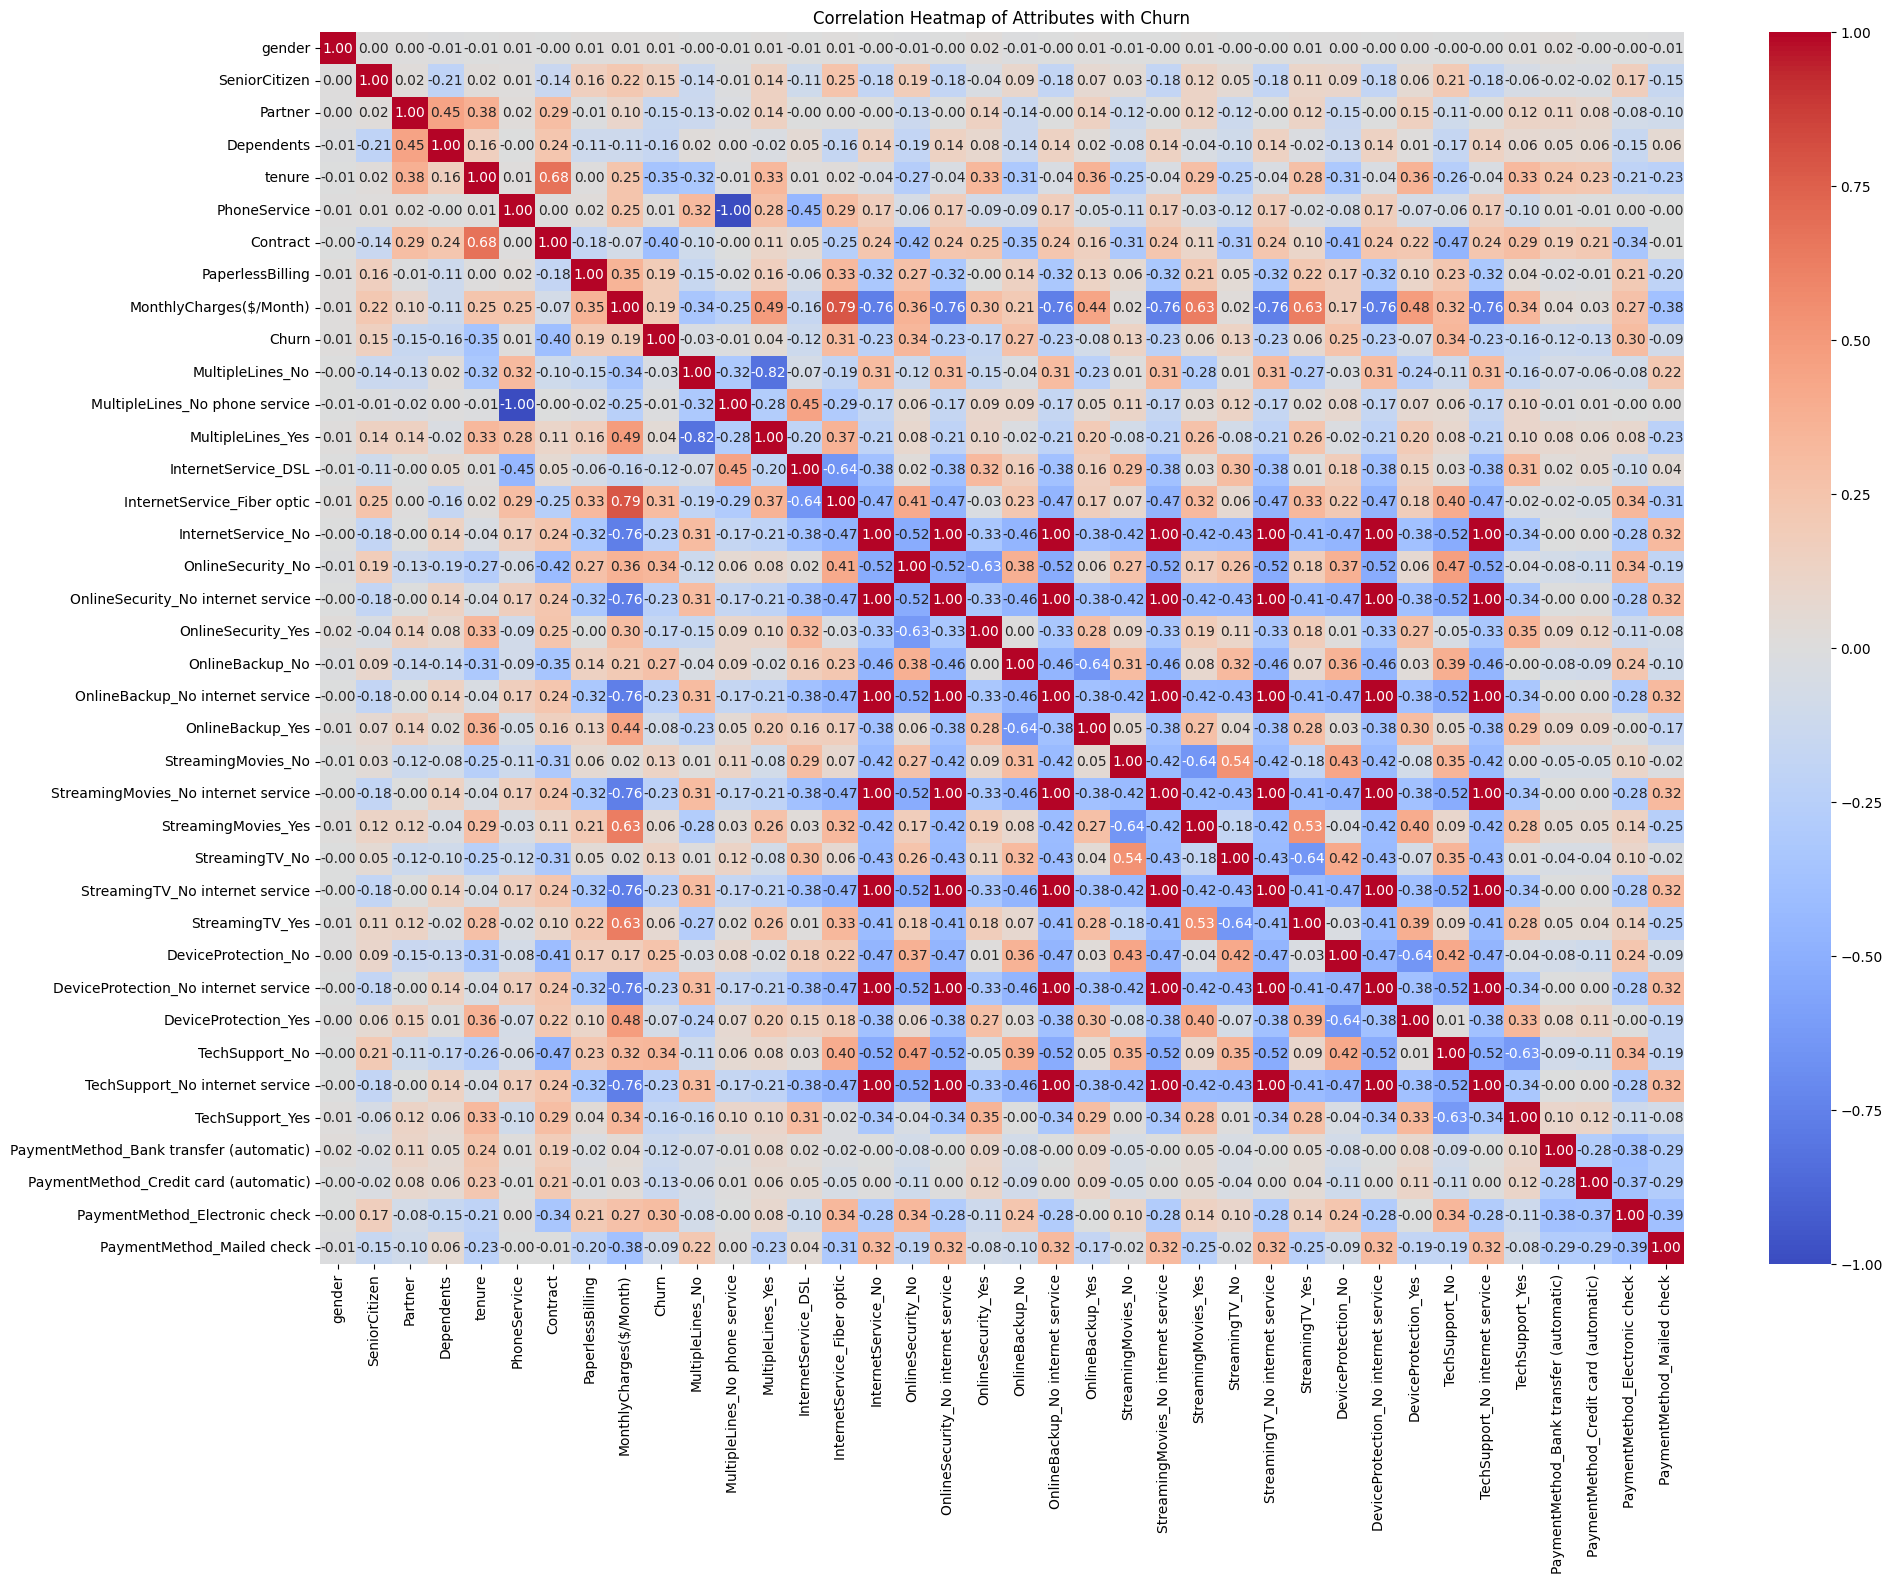

In [ ]:
df_dropped = df.drop(columns=one_hot_columns)
new_df = df_dropped.select_dtypes(include=['number'])
correlation_matrix = new_df.corr()
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
print("Most correlated attributes with Churn:")
print(churn_correlation)
plt.figure(figsize=(22, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Attributes with Churn")
plt.show()

# The categorical encoded columns are dropped as they are already encoded using one-hot encoding.
# The correlation between numerical attributes and the 'Churn' is calculated and displayed.
# Heatmap is displayed to show the correlation between all numerical attributes and the 'Churn'.

**Answer for Q1**: OnlineSecurity_No had the highest positive correlation with churn as it is equal to 0.342235, which indicates it has weak positive correlation, which means as the OnlineSecurity_No increase the Churn Rate increases (They are directly related).

On the other hand, the Contract has the highest negative correlation with churn as it is equal to -0.396150 , which indicates weak negative correlation, which means as the Contract increase the Churn Rate Decreases, and vice versa (They are inversely related)

**Q2: Which payment method has the highest churn rate?**

**Visualization**

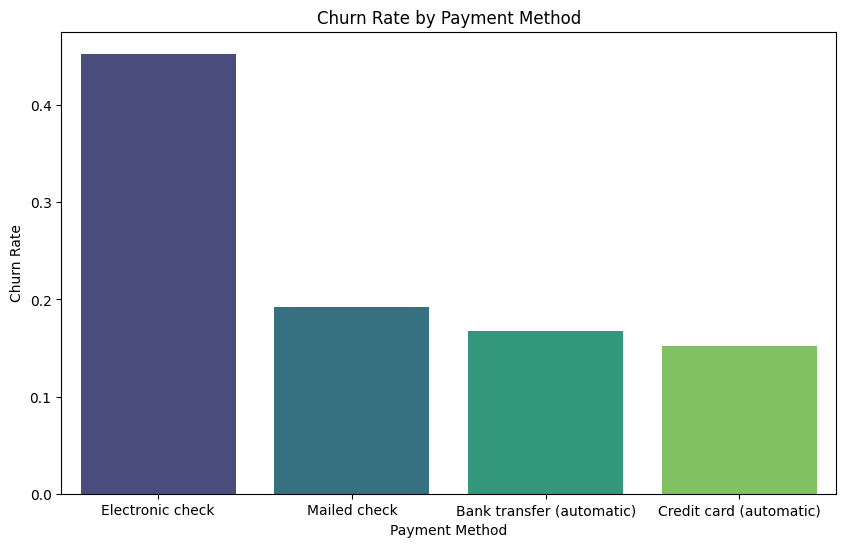

In [ ]:
churn_by_payment = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_payment.index, y=churn_by_payment.values, hue=churn_by_payment.index, palette='viridis')

plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.show()

# Average Churn Rate is calculated for each Payment Method
# Bar plot is created to visualize the Churn Rate for each Payment Method


**Answer for Q2**: The payment method with the highest churn rate is Electronic Check with a churn rate of 0.45, followed by Mailed Check, then Bank Transfer, then Credit Card.

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

25th, 50th (median), and 75th percentiles of tenure for churned customers:
0.25     2.0
0.50    10.0
0.75    29.0
Name: tenure, dtype: float64


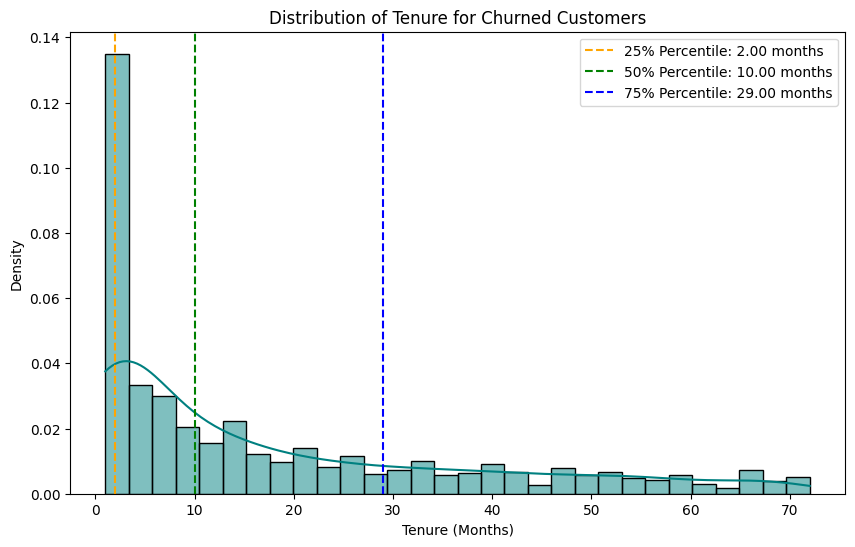

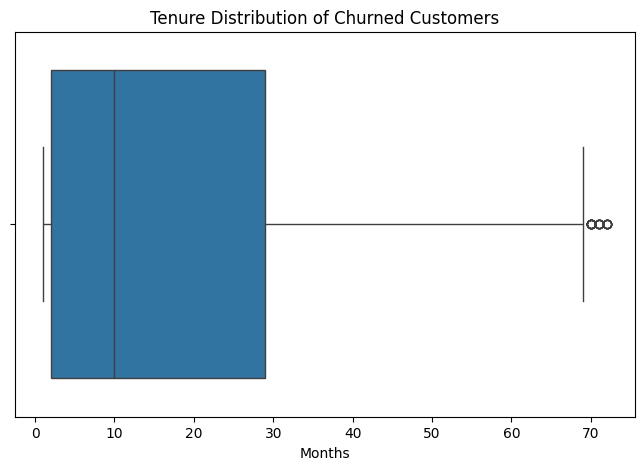

In [ ]:
churned_customers = df[df['Churn'] == 1]

churned_tenure_percentiles = churned_customers['tenure'].quantile([0.25, 0.5, 0.75])

print("25th, 50th (median), and 75th percentiles of tenure for churned customers:")
print(churned_tenure_percentiles)

percentiles = churned_tenure_percentiles.to_dict()
tenure_churned = churned_customers['tenure']


plt.figure(figsize=(10, 6))
sns.histplot(tenure_churned, bins=30, kde=True, color='teal', stat='density')

plt.axvline(percentiles[0.25], color='orange', linestyle='--', label=f'25% Percentile: {percentiles[0.25]:.2f} months')
plt.axvline(percentiles[0.50], color='green', linestyle='--', label=f'50% Percentile: {percentiles[0.50]:.2f} months')
plt.axvline(percentiles[0.75], color='blue', linestyle='--', label=f'75% Percentile: {percentiles[0.75]:.2f} months')

plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=churned_customers, x='tenure')
plt.title('Tenure Distribution of Churned Customers')
plt.xlabel('Months')
plt.show()

# Selected the customers who churned (Churn = 1)
# Calculated the percntiles 25th, 50th (median), and 75th percentiles of the tenure for churned customers to understand the distribution of customer tenure.
# Histogram is displayed to show the distribution of tenure for churned customers, with plotted lines at the 25th, 50th, and 75th percentiles.
# Boxplot is plotted to visually display the spread, median, and outliers of tenure for churned customers.

**Answer for Q3**: 25% (Q1) of the customers churned within the first 2 months, 50% (Q2) of the customers churned within the first 10 months and 75% (Q3) of the of the customers churned within the first 29 months.
So, Customers commonly churn within 29 months.

## Data Preparation for Modelling

## Modelling

In [ ]:
columns_to_drop = ['Churn', 'customerID']
categorical_columns = [col for col in df.select_dtypes(include=['object', 'category']).columns]
columns_to_drop += categorical_columns

X = df.drop(columns=columns_to_drop)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(criterion ='entropy', random_state=42,max_depth=5)
tree_model.fit(X_train, y_train)

# Dropped the 'Churn' attribute as this is the attribute that will be predicted.
# Dropped the 'customerID' as it will not be used in the tree as each value is unique.
# Dropped the categorical columns as they will not be used in the model and they are already encoded using the one-hot encoding and the encoded attributes will be used in the decision tree instead of the original attributes.
# Split the data to trian 80% and test 20%
# The information gain is uesd to split the tree, the column 'Contact' is the one with the highest information gain.

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

### Tree Visualization

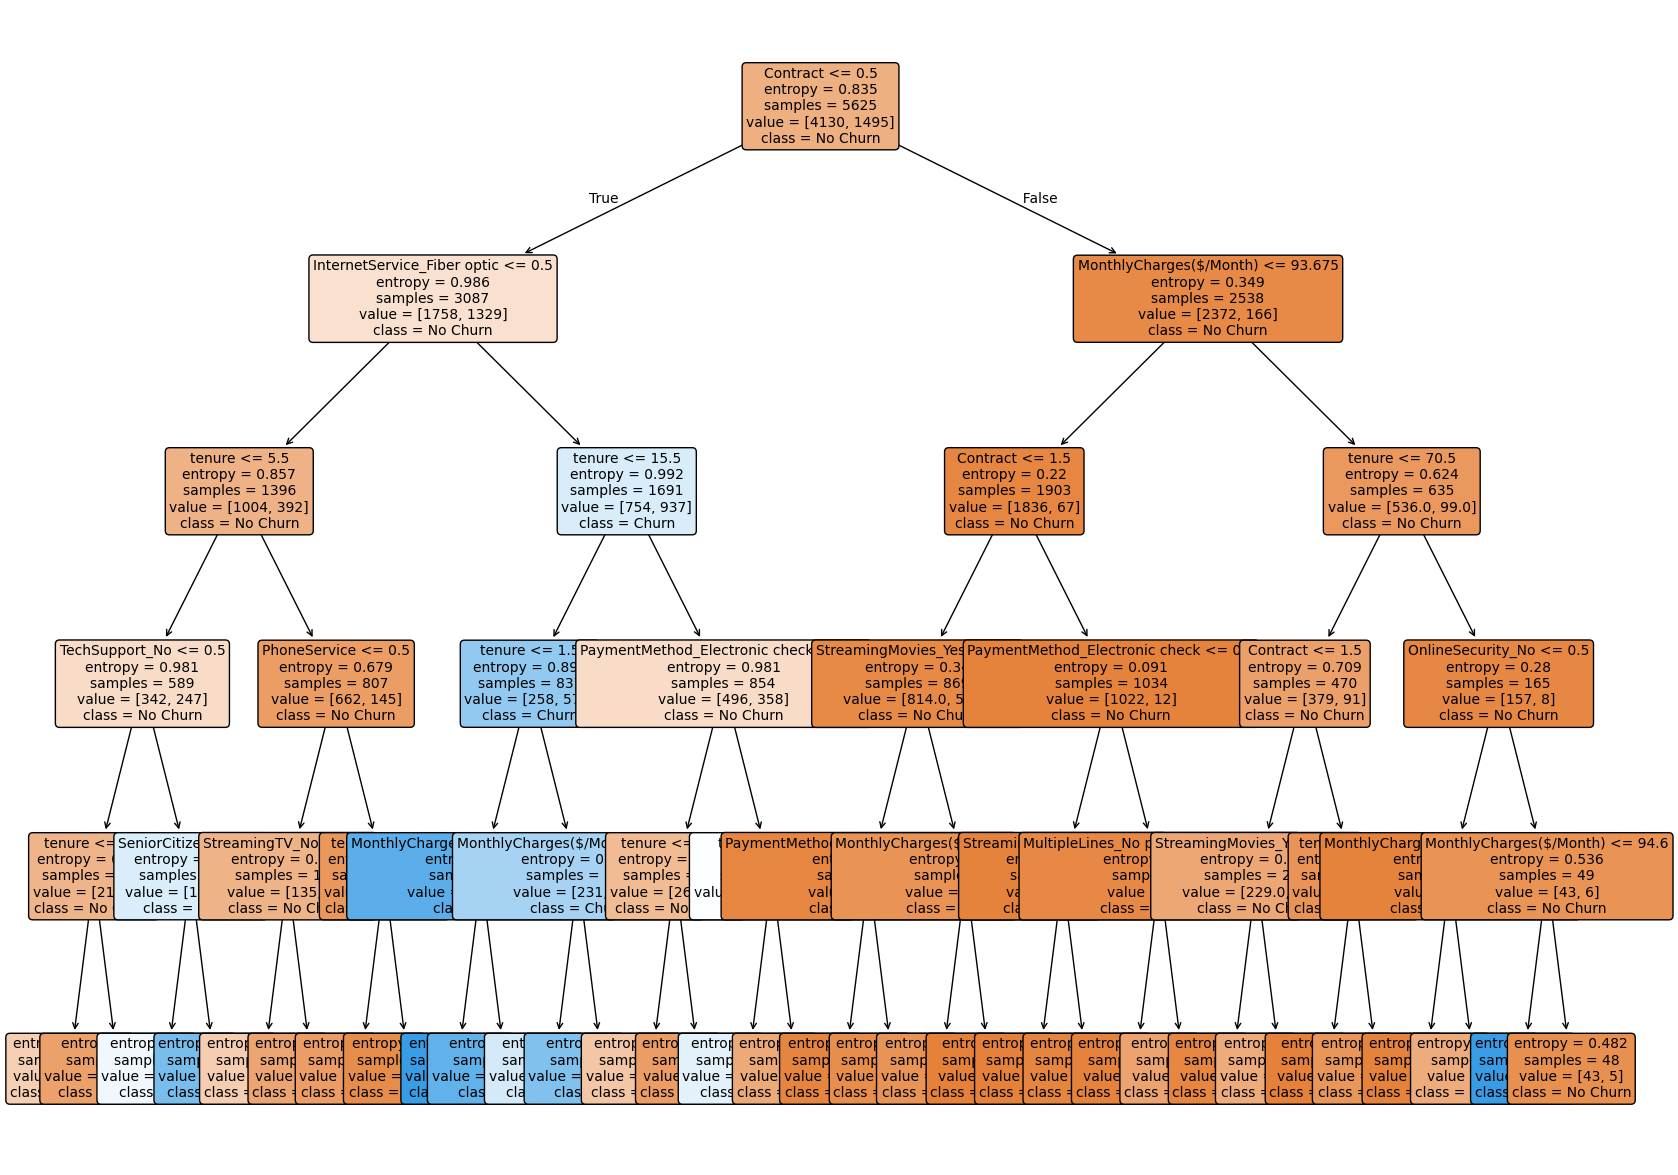

In [ ]:
plt.figure(figsize=(20, 15))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'], rounded=True, fontsize=10)
plt.show()

# tree_rules = export_text(tree_model, feature_names=X.columns.tolist())
# print(tree_rules)

# Tree is visualized in order to display the rules of the tree.
# Rule: If Contract type is Month-To-Month, InternetService is Fiber optic, Tenure <= 1.5 months and Tech Support is No then the Customer will not churn.

## Evaluation

In [ ]:
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# print('Training')
# print(f'Accuracy: {accuracy_score(y_train, y_train_pred) * 100:.2f} %')
# print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
# print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

print('Testing')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred) * 100:.2f} %')
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# The model predicted correct values for 77.83% of the test data.
# The model predicted churn that was actually churn by 58%.
# The model correctly identified 59% of the total churn.
# The f1-score is equal to 59% which represents the balance between precision and recall.
# True Negative = 873, False Positive = 160, False Negative = 152 and True Positive = 222.
# F1 scores is most suitable to evaluate on because it make a balance between precision and recall.
# F1 scores are ideal for evaluating models in imbalanced datasets, as they balance precision and recall, allowing for better handling of false positives and false negatives.

Testing
Accuracy: 77.83 %

Confusion Matrix:
 [[873 160]
 [152 222]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.58      0.59      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



## Bonus (Optional)

In [ ]:
columns_to_drop = ['Churn', 'customerID']
categorical_columns = [col for col in df.select_dtypes(include=['object', 'category']).columns]
columns_to_drop += categorical_columns

X = df.drop(columns=columns_to_drop)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logregress = LogisticRegression(max_iter=2000)
logregress.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_train_pred = logregress.predict(X_train)
y_test_pred = logregress.predict(X_test)

# print('Training')
# print(f'Accuracy: {accuracy_score(y_train, y_train_pred) * 100:.2f} %')
# print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
# print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

print('Testing')
print(f'Accuracy: {accuracy_score(y_test, y_test_pred) * 100:.2f} %')
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


# The model predicted correct values for 79.62% of the test data.
# The model predicted churn that was actually churn by 64%.
# The model correctly identified 53% of the total churn.
# The f1-score is equal to 58% which represents the balance between precision and recall.
# True Negative = 1384, False Positive = 165, False Negative = 265 and True Positive = 296.
# F1 scores is most suitable to evaluate on because it make a balance between precision and recall.
# F1 scores are ideal for evaluating models in imbalanced datasets, as they balance precision and recall, allowing for better handling of false positives and false negatives.

Testing
Accuracy: 79.62 %

Confusion Matrix:
 [[1384  165]
 [ 265  296]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



#Comparing the Models

 So, the decision tree is going  to be chosen as it has a higher f1 score by 1 % than the logistic regression.
